In [1]:
from notebook_whisperer import start_helper, ask, assist
start_helper()

Usage:
  ask("some-question") -- submits question to chatGPT and displays response
  assist("request")    -- submits code request to chatGPT and creates cell with response
                          click in the cell and press control-enter to execute

Questions, comments and suggestions to matthewcleggphd@gmail.com


In [ ]:
assist("Use Yahoo data to plot the daily prices of SPY vs QQQQ over the last year")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


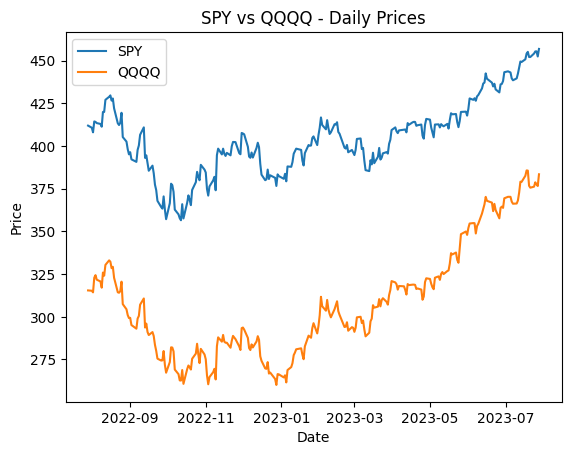

In [2]:
# 2023-07-29 17:19:41 Use Yahoo data to plot the daily prices of SPY vs QQQQ over the last year
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download the data from Yahoo Finance
spy_data = yf.download('SPY', period='1y')
qqqq_data = yf.download('QQQ', period='1y')

# Plot the daily prices
plt.plot(spy_data.index, spy_data['Close'], label='SPY')
plt.plot(qqqq_data.index, qqqq_data['Close'], label='QQQQ')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY vs QQQQ - Daily Prices')
plt.legend()
plt.show()

In [3]:
assist("What is the correlation between SPY and QQQQ?")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 2023-07-29 18:00:29 What is the correlation between SPY and QQQQ?

# Calculate the correlation between SPY and QQQQ
correlation = spy_data['Close'].corr(qqqq_data['Close'])
correlation


0.9425109024112411

In [5]:
ask("What does it mean for two stocks to be cointegrated?")

<IPython.core.display.Javascript object>

When two stocks are cointegrated, it means that there is a long-term equilibrium relationship between their prices. Cointegrated stocks tend to move together in the long run, even though they may experience short-term deviations from each other.

Cointegration is a statistical property that suggests that even though two time series, such as stock prices, may not be stationary individually, their linear combination can be stationary. It implies that there is a long-term relationship between the two stocks, and any deviations from this relationship (known as the spread) will eventually converge back to the equilibrium.

In simpler terms, if two stocks are cointegrated, it means that there is a stable relationship between their prices over time. When the spread between their prices widens, it is likely to narrow down, and vice versa. This can provide opportunities for pairs trading or other trading strategies that aim to exploit the convergence of the spread.

To determine if two stocks are cointegrated, statistical tests such as the Engle-Granger test or the Johansen test can be used. These tests examine the relationship between the two stocks and determine if there is a long-term equilibrium relationship present.

In [6]:
assist("Are SPY and QQQQ cointegrated?")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# 2023-07-29 18:05:22 Are SPY and QQQQ cointegrated?

import statsmodels.api as sm

# Create a DataFrame with 'SPY' and 'QQQQ' closing prices
df = pd.DataFrame({'SPY': spy_data['Close'], 'QQQQ': qqqq_data['Close']})

# Add a constant to the DataFrame
df['const'] = 1

# Perform the Engle-Granger cointegration test
results = sm.OLS(df['SPY'], df[['QQQQ', 'const']]).fit() 
is_cointegrated = results.pvalues[0] < 0.05

is_cointegrated


True

In [ ]:
assist("How much profit or loss would I have made if I had used those entry and exit points?")